<a href="https://colab.research.google.com/github/namita-ach/SDS-HW/blob/main/summary_statistics_w_deleted_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
pip install pandas

In [84]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt

In [85]:
#read the csv
data = pd.read_csv('company_sales_data_w_deleted_values.csv')

In [86]:
#make the dataframe
df = pd.DataFrame(data)
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,NaN,1500.0,5200.0,NaN,1200.0,1500.0,NaN,NaN
1,2,2630.0,1200.0,5100.0,6100.0,2100.0,1200.0,18330.0,NaN
2,3,NaN,1340.0,4550.0,9550.0,NaN,1340.0,NaN,224700.0
3,4,3400.0,1130.0,NaN,NaN,1870.0,NaN,22270.0,NaN
4,5,3600.0,1740.0,4560.0,7760.0,1560.0,1740.0,NaN,NaN
5,6,NaN,NaN,4890.0,7490.0,1890.0,NaN,20140.0,NaN
6,7,2980.0,1120.0,4780.0,NaN,1780.0,1120.0,29550.0,295500.0
7,8,3700.0,1400.0,NaN,9960.0,2860.0,NaN,36140.0,NaN
8,9,NaN,1780.0,6100.0,8100.0,2100.0,1780.0,NaN,NaN
9,10,1990.0,1890.0,8300.0,10300.0,NaN,1890.0,26670.0,266700.0


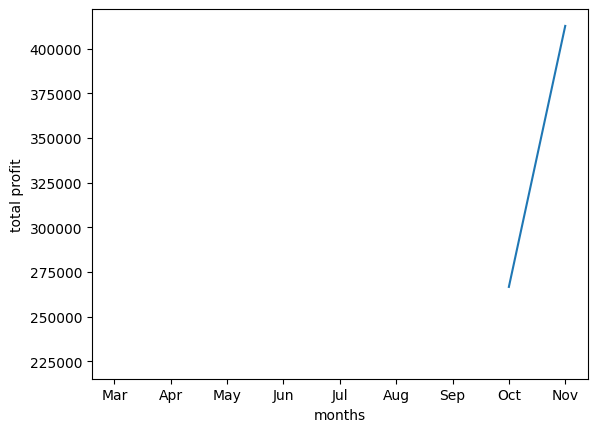

In [87]:
df = pd.DataFrame(data, index=None)
profit_list = df['total_profit'].tolist()
plt.plot(x,profit_list)
plt.xlabel('months')
plt.ylabel('total profit')
plt.show()

In [88]:
#new copies of the dataframe
df_for_median = df.copy()
df_for_mean = df.copy()

In [89]:
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [90]:
#finding the number of parameters = number of columns -1
columns = len(df.axes[1])
print(f"The number of parameters is {columns-1}")

The number of parameters is 8


In [91]:
#shows us the top of the dataset
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,NaN,1500.0,5200.0,NaN,1200.0,1500.0,NaN,NaN
1,2,2630.0,1200.0,5100.0,6100.0,2100.0,1200.0,18330.0,NaN
2,3,NaN,1340.0,4550.0,9550.0,NaN,1340.0,NaN,224700.0
3,4,3400.0,1130.0,NaN,NaN,1870.0,NaN,22270.0,NaN
4,5,3600.0,1740.0,4560.0,7760.0,1560.0,1740.0,NaN,NaN


In [92]:
#tells us how much info we have in each field
df.count()

month_number    12
facecream        8
facewash        11
toothpaste      10
bathingsoap      8
shampoo         10
moisturizer      9
total_units      8
total_profit     4
dtype: int64

In [93]:
#summary about the kind of information we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month_number  12 non-null     int64  
 1   facecream     8 non-null      float64
 2   facewash      11 non-null     float64
 3   toothpaste    10 non-null     float64
 4   bathingsoap   8 non-null      float64
 5   shampoo       10 non-null     float64
 6   moisturizer   9 non-null      float64
 7   total_units   8 non-null      float64
 8   total_profit  4 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 992.0 bytes


In [94]:
#finding the parameters
for parameter in df.axes[1][1:]:
  print(parameter)

facecream
facewash
toothpaste
bathingsoap
shampoo
moisturizer
total_units
total_profit


Replace NaN w/ median:

In [95]:
def fill_na_with_median(df):
    for column in df.columns:
        median = np.nanmedian(df[column])
        df[column].replace(np.nan, median, inplace=True)
    return df

In [96]:
median_substitution = fill_na_with_median(df_for_median)
median_substitution

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2940.0,1500.0,5200.0,8825.0,1200.0,1500.0,28110.0,281100.0
1,2,2630.0,1200.0,5100.0,6100.0,2100.0,1200.0,18330.0,281100.0
2,3,2940.0,1340.0,4550.0,9550.0,1880.0,1340.0,28110.0,224700.0
3,4,3400.0,1130.0,5150.0,8825.0,1870.0,1740.0,22270.0,281100.0
4,5,3600.0,1740.0,4560.0,7760.0,1560.0,1740.0,28110.0,281100.0
5,6,2940.0,1500.0,4890.0,7490.0,1890.0,1740.0,20140.0,281100.0
6,7,2980.0,1120.0,4780.0,8825.0,1780.0,1120.0,29550.0,295500.0
7,8,3700.0,1400.0,5150.0,9960.0,2860.0,1740.0,36140.0,281100.0
8,9,2940.0,1780.0,6100.0,8100.0,2100.0,1780.0,28110.0,281100.0
9,10,1990.0,1890.0,8300.0,10300.0,1880.0,1890.0,26670.0,266700.0


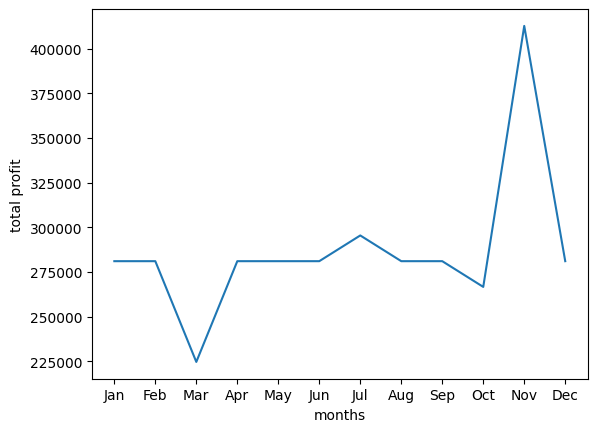

In [97]:
profit_list = df_for_median['total_profit'].tolist()
plt.plot(x,profit_list)
plt.xlabel('months')
plt.ylabel('total profit')
plt.show()

Replace NaN w/ mean:

In [98]:
def fill_na_with_mean(df):
    for column in df.columns:
        mean = np.nanmean(df[column])
        df[column].replace(np.nan, mean, inplace=True)
    return df

In [99]:
mean_substitution = fill_na_with_mean(df_for_mean)
mean_substitution

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2942.5,1500.000000,5200.0,9207.5,1200.0,1500.000000,28050.0,299925.0
1,2,2630.0,1200.000000,5100.0,6100.0,2100.0,1200.000000,18330.0,299925.0
2,3,2942.5,1340.000000,4550.0,9550.0,1956.0,1340.000000,28050.0,224700.0
3,4,3400.0,1130.000000,5818.0,9207.5,1870.0,1603.333333,22270.0,299925.0
4,5,3600.0,1740.000000,4560.0,7760.0,1560.0,1740.000000,28050.0,299925.0
5,6,2942.5,1541.818182,4890.0,7490.0,1890.0,1603.333333,20140.0,299925.0
6,7,2980.0,1120.000000,4780.0,9207.5,1780.0,1120.000000,29550.0,295500.0
7,8,3700.0,1400.000000,5818.0,9960.0,2860.0,1603.333333,36140.0,299925.0
8,9,2942.5,1780.000000,6100.0,8100.0,2100.0,1780.000000,28050.0,299925.0
9,10,1990.0,1890.000000,8300.0,10300.0,1956.0,1890.000000,26670.0,266700.0


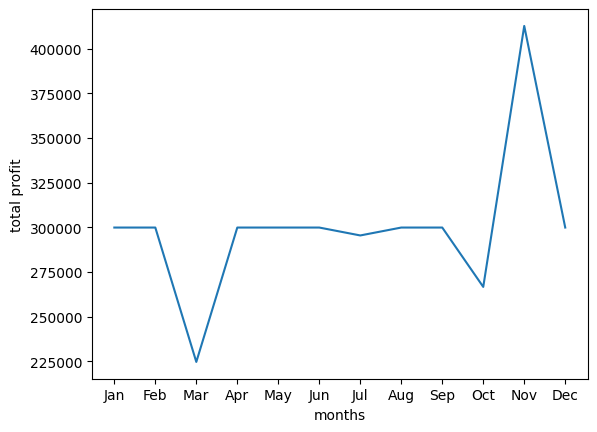

In [100]:
df = pd.DataFrame(data, index=None)
profit_list = df_for_mean['total_profit'].tolist()
plt.plot(x,profit_list)
plt.xlabel('months')
plt.ylabel('total profit')
plt.show()